#***PROJECT DEVELOPMENT PHASE SPRINT 4***

# **Amazon Prime EXPLORATORY DATA ANALYSIS of its shows and content.**

Lets import relevant libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import io
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import files
uploaded = files.upload()

Saving amazon_prime_titles.csv to amazon_prime_titles.csv


#Loading Dataset

In [3]:
df = pd.read_csv("amazon_prime_titles.csv")
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
5,s6,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,"March 30, 2021",1989,NaN,52 min,"Fantasy, Kids",The story unfolds in a an English seaside town...
6,s7,Movie,Hired Gun,Fran Strine,"Alice Cooper, Liberty DeVitto, Ray Parker Jr.,...",United States,"March 30, 2021",2017,NaN,98 min,"Documentary, Special Interest","They are the ""First Call, A-list"" musicians, j..."
7,s8,Movie,Grease Live!,"Thomas Kail, Alex Rudzinski","Julianne Hough, Aaron Tveit, Vanessa Hudgens, ...",United States,"March 30, 2021",2016,NaN,131 min,Comedy,"This honest, uncompromising comedy chronicles ..."
8,s9,Movie,Global Meltdown,Daniel Gilboy,"Michael Paré, Leanne Khol Young, Patrick J. Ma...",Canada,"March 30, 2021",2017,NaN,87 min,"Action, Science Fiction, Suspense",A helicopter pilot and an environmental scient...
9,s10,Movie,David's Mother,Robert Allan Ackerman,"Kirstie Alley, Sam Waterston, Stockard Channing",United States,"April 1, 2021",1994,NaN,92 min,Drama,Sally Goodson is a devoted mother to her autis...


#Investigating Data
Let's first check the total number of rows and columns

In [4]:
df.shape

(9668, 12)

In [5]:
df.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Data Cleaning


In [7]:
df.drop("show_id" , axis=1 , inplace=True)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [8]:
df = df.drop_duplicates(["title"])
print("Duplicates removed")

Duplicates removed


In [9]:
df["cast"] = df["cast"].replace(np.nan , "Unavailable")
df["director"] = df["director"].replace(np.nan , "Unavailable")

In [10]:
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])

In [11]:
df=df.reset_index()
df.head()

,index,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [12]:
df["date_added"] = df["date_added"].fillna("January 01, {}".format(str(df["release_year"].mode()[0])))

In [13]:
import re
months = {'January':1 , 'February':2 , 'March':3 , 'April':4 , 'May':5 , 'June':6 , 'July':7 , 'August':8 , 
          'September':9 , 'October':10 , 'November':11 , 'December':12}

date_list = []

for i in df["date_added"]:
    str1= re.findall('([a-zA-Z]+)\s[0-9]+\,\s[0-9]+' , i)
    str2= re.findall('[a-zA-Z]+\s([0-9]+)\,\s[0-9]+' , i)
    str3= re.findall('[a-zA-Z]+\s[0-9]+\,\s([0-9]+)' , i)
    dates = '{}-{}-{}'.format(str2[0] , months[str1[0]] , str3[0])
    date_list.append(dates)

In [14]:
df["date_added_cleaned"] = date_list

In [15]:
df['date_added_cleaned']=df['date_added_cleaned'].astype('datetime64[ns]')

In [16]:
for i , j in zip(df["country"].values , df.index):
    if i == np.nan:
        if (('Anime' in df.loc[j,'listed_in']) or ('anime' in df.loc[j,'listed_in'])):
            print(j)
            df.loc[j,'country'] ='Japan'
        elif (('Western' in df.loc[j,'listed_in']) or ('western' in df.loc[j,'listed_in'])):
            print(j)
            df.loc[j,'country'] ='United States'
        else:
            continue
    else:
        continue


In [17]:
df.head()

,index,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_cleaned
0,0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...,2021-03-30
1,1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,2021-03-30
2,2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,2021-03-30
3,3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",2021-03-30
4,4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,2021-03-30


Now as we have cleaned data, we can proceed with analyzing this data. 

#Exploratory Data Analysis

#What does each category in ratings define?

In [18]:
df["rating"].unique()

array(['13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+', 'TV-PG',
       '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G', 'PG',
       'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

In [19]:
# We can combine the some ratings category to one single category 
# For Example:  NOT_RATE and UNRATED can be combined to say UNRATED

for i in df.index:
    if df.loc[i,"rating"]== "NOT_RATE":
        df.loc[i,"rating"] = "UNRATED"
    elif df.loc[i,"rating"]== "AGES_18_":
        df.loc[i,"rating"] = "18+"
    elif (df.loc[i,"rating"]== "AGES_16_") or (df.loc[i,"rating"]== "16"):
        df.loc[i,"rating"] = "16+"
    elif df.loc[i,"rating"]== "ALL_AGES":
        df.loc[i,"rating"] = "G"
    else:
        continue


# How many movies and TV shows does Amazon Prime have based on each category of the ratings?

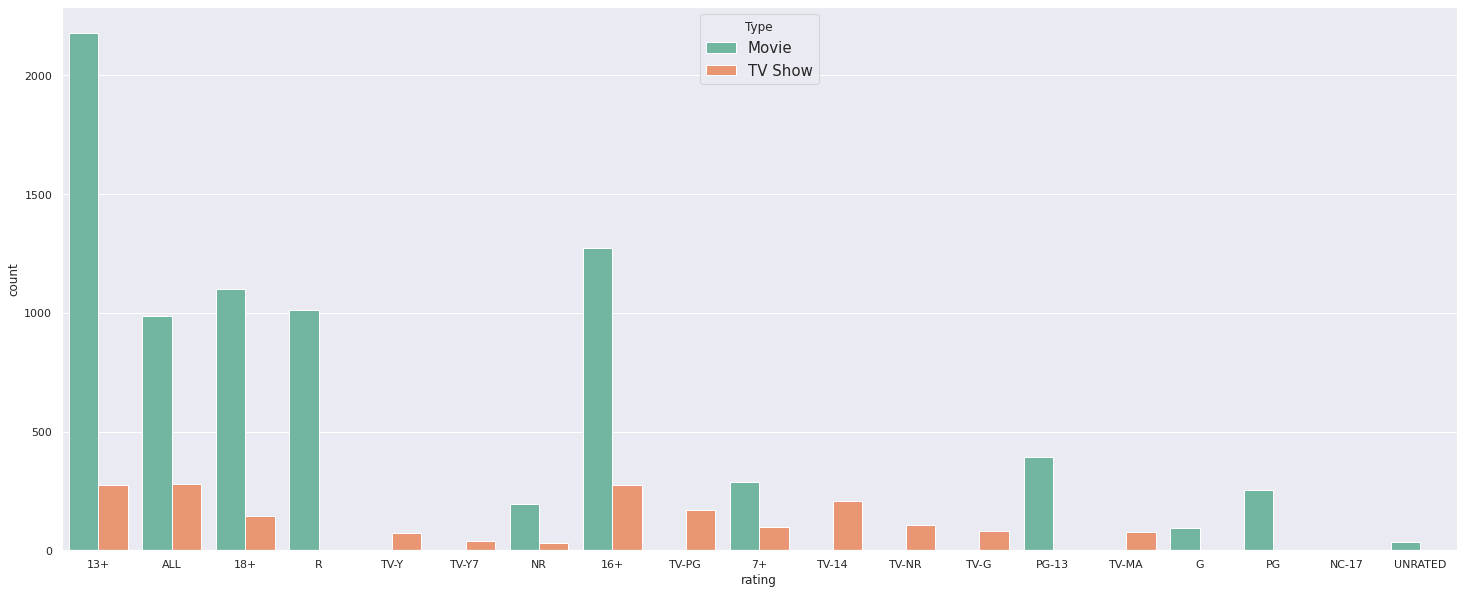

In [20]:
plt.figure(figsize=(25,10))
sns.set_theme(style="darkgrid")
sns.countplot(x="rating", hue="type" , data=df, palette="Set2")
plt.legend(loc='upper center', title="Type", fontsize=15)

#Which is the highest watched rating categories in TV shows and movies?

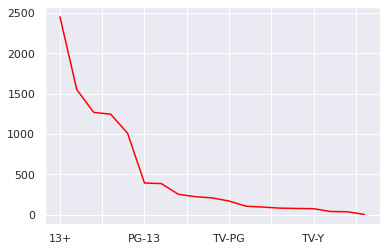

In [21]:
# To find the most popular rating category

df["rating"].value_counts().plot(color = "red")

#What are the most watched category in each country?

Text(0.5, 1.0, 'Distribution of Prime movies & shows across ratings')

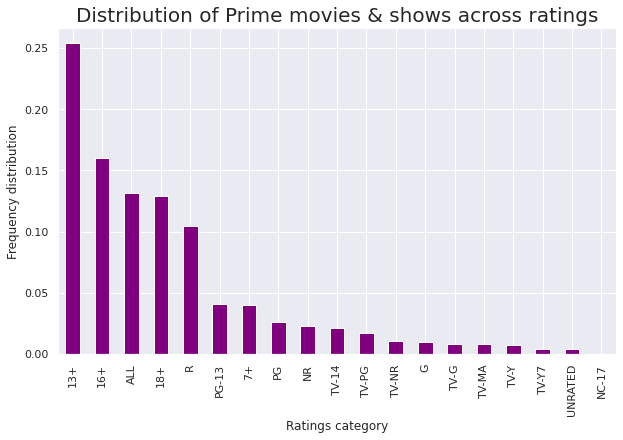

In [22]:
plt.figure(figsize=(10,6))
df["rating"].value_counts(normalize =True).plot(kind="bar", color = "purple")
plt.xlabel("Ratings category")
plt.ylabel("Frequency distribution")
plt.title("Distribution of Prime movies & shows across ratings" , fontsize=20)

#Which is more popular on Prime? Movies or TV shows?

**Movies and shows of rating 13+ are more popular in Prime, followed by 16+ and others**

In [23]:
df["country"].value_counts().sort_values(ascending=False)

United States                          253
India                                  229
United Kingdom                          28
Canada                                  16
United Kingdom, United States           12
                                      ... 
United States, Switzerland               1
United States, Germany, Italy            1
United States, United Arab Emirates      1
Iran, France                             1
Italy, Spain                             1
Name: country, Length: 86, dtype: int64

**As we have group of countries as many entries, let's focus of the top 4 countries for analysis**

In [25]:
df_top4 = df[(df["country"]=="United States") | (df["country"]=="India") | (df["country"]=="United Kingdom") | 
             (df["country"]=="Canada")]
df_top4.head(10)

,index,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_cleaned
0,0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...,2021-03-30
1,1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,2021-03-30
2,2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,2021-03-30
3,3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",2021-03-30
4,4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,2021-03-30
5,5,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,"March 30, 2021",1989,13+,52 min,"Fantasy, Kids",The story unfolds in a an English seaside town...,2021-03-30
6,6,Movie,Hired Gun,Fran Strine,"Alice Cooper, Liberty DeVitto, Ray Parker Jr.,...",United States,"March 30, 2021",2017,13+,98 min,"Documentary, Special Interest","They are the ""First Call, A-list"" musicians, j...",2021-03-30
7,7,Movie,Grease Live!,"Thomas Kail, Alex Rudzinski","Julianne Hough, Aaron Tveit, Vanessa Hudgens, ...",United States,"March 30, 2021",2016,13+,131 min,Comedy,"This honest, uncompromising comedy chronicles ...",2021-03-30
8,8,Movie,Global Meltdown,Daniel Gilboy,"Michael Paré, Leanne Khol Young, Patrick J. Ma...",Canada,"March 30, 2021",2017,13+,87 min,"Action, Science Fiction, Suspense",A helicopter pilot and an environmental scient...,2021-03-30
9,9,Movie,David's Mother,Robert Allan Ackerman,"Kirstie Alley, Sam Waterston, Stockard Channing",United States,"April 1, 2021",1994,13+,92 min,Drama,Sally Goodson is a devoted mother to her autis...,2021-01-04


#What was the focus of Prime on type of content in recent years?

Text(0.5, 1.0, 'Comparing the content type available in top 4 countries')

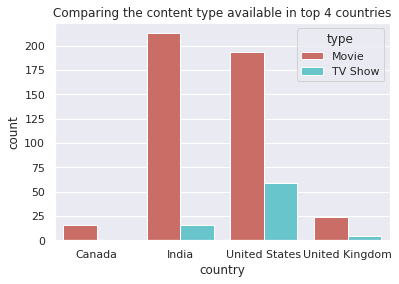

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x="country" , hue="type" , data=df_top4, palette="hls")
plt.title("Comparing the content type available in top 4 countries", fontsize=12)

Text(0.5, 1.0, 'Distribution of rating-based movies and shows in top 4 countries')

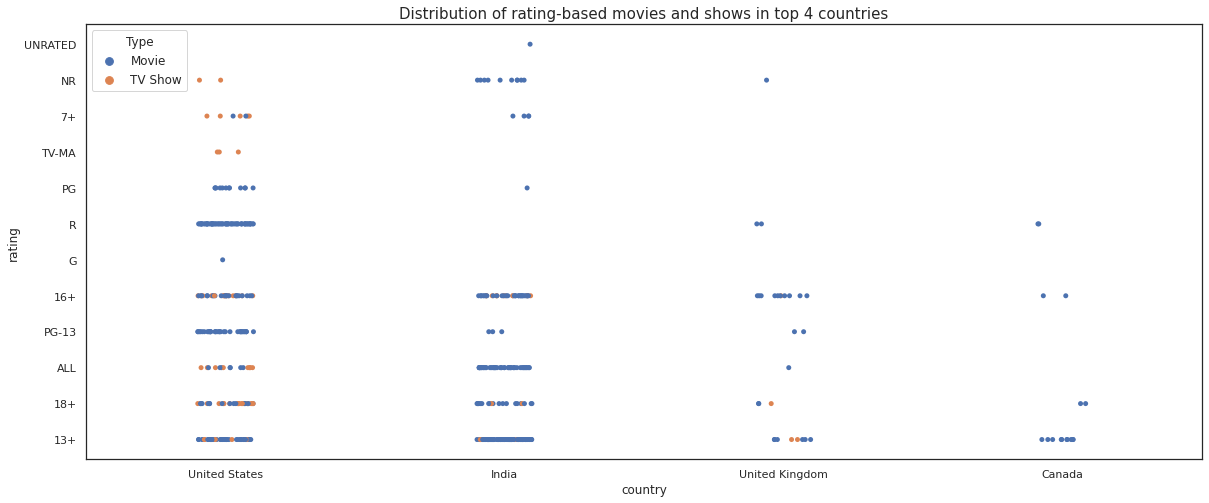

In [27]:
plt.figure(figsize=(20,8))
sns.set_theme(style = "white")
sns.stripplot(x="country" , y="rating" , hue="type", data=df_top4 , order=["United States" , "India" , "United Kingdom" , "Canada"])
plt.legend(loc="upper left" , title="Type" , fontsize=12)
plt.title("Distribution of rating-based movies and shows in top 4 countries", fontsize=15)

**We observe that in India, Amazon Prime has considerably more content in Movies as compared to TV Shows. Next in line is the United States but here the number of TV Shows produced is the highest out of the top four countries.**

In [28]:
df["type"].value_counts(normalize=True)

Movie      0.808233
TV Show    0.191767
Name: type, dtype: float64

In [29]:
df["year"]=df["date_added_cleaned"].dt.year
df.head()

,index,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_cleaned,year
0,0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...,2021-03-30,2021
1,1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,2021-03-30,2021
2,2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,2021-03-30,2021
3,3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",2021-03-30,2021
4,4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,2021-03-30,2021


In [30]:
df.groupby("year")["type"].value_counts(normalize=True)*100

year  type   
2021  Movie      80.823335
      TV Show    19.176665
Name: type, dtype: float64

**From above analysis we can come to a conclusion that in Amazon Prime the content focus has been on Movies for upto 81% and the remaining 19% on TV Shows.** 

**Out of all the content available on Prime, Movies and shows of rating 13+ are more popular, followed by 16+ and others.**
**To be more specific, we have found that 13+ rated movies are highly produced as compared to the rated TV shows.**

**Amazon Prime has the highest content availability in United States, next in line is India, United Kingdom and Canada**
